# Week 3 Seminar.

### Course: ML with Python, 2023/2024, HSE
### Author: Oleg Melnikov, Teaching Team.

In this exercise we will explore some of the datasets included in the textbook.

In [1]:
# allows us to print multiple outputs from a single Colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load important libraries that we might use
import numpy as np, pandas as pd, matplotlib.pylab as plt
import seaborn as sns, statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('display.max_rows', 15, 'display.max_columns', 500, 'display.max_colwidth', 1, 'display.precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
plt.rcParams['figure.figsize'] = [16, 6]

# Auto Data Set with Pandas DataFrame

We can load dataframe directly from URL (where all textbook data files are stored).

**Why**: We want to evaluate the *Auto* data matrix in Colab and observe its structure and values.

**Takeaway**:
* From results below we learn that our dataframe `df` has 397 observations and 9 variables.
* All values except name appear numeric.
* We have 5 objects with missing values.

In [2]:
csv_url = 'https://raw.githubusercontent.com/omelnikov/data/main/auto/auto.csv'  # assign file path to a variable
df = pd.read_csv(csv_url)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## Data Types

We proceed to some exploration of the dataset. `df.info()` is a quick way to investigate any obvious problems.

**Why:** We should always familiarize ourselves with the data structures of our data. Unexpected data types can ruin model performance. For example, numbers loaded as strings will lose their ordering and associated algebraic operations.

**Takeaway:** The results of `df.info()` below indicate
* mix of integer and floating value variables, except for name => need to drop name for now
* 28+KB data in memory => not a problem on RAM resources
* 9 variables and 397 values in every column, as expected
* We have 5 objects with missing values in horsepower columns => let's drop them in order to avoid a problem for numeric computations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
df = df.drop('name', axis=1)  # drop the column 'name'
df = df.dropna()
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


## Correlation plot

Typically we avoid redundancy, whenever possible. Here for the sake of demonstrating an alternative method, we use the seaborn library to plot a correlation matrix. Notably, this quantifies the qualitative images we saw above.

**Why:** We want to evaluate the linear relationships among all variables. This suggests the important helpful (correlating with) and problematic features.

**Takeaway:**
* The correlation between `acceleration` and some other features is less than 0.5 in absolute values so we should try to go beyond a linear model to reveal non-linear dependencies.
* We observe strong correlations for some features -- there could be multicollinearity problems.




In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


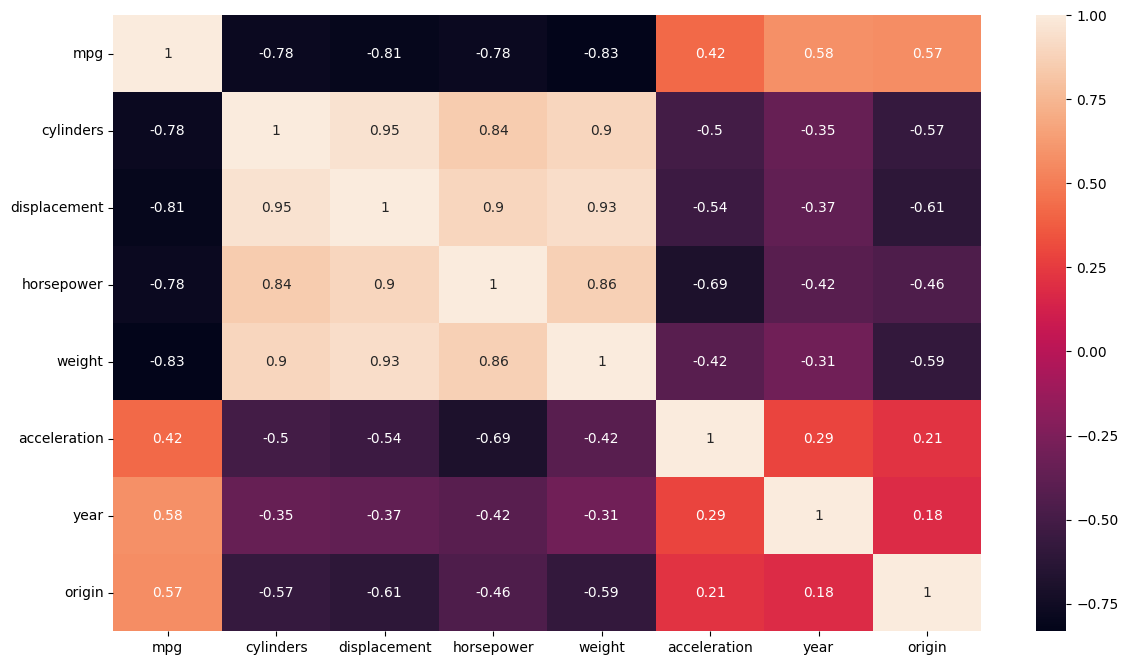

In [12]:
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df.corr(), annot=True);

## Relationships

**Why:** The stats above value hint on relationships among our variables. We can build a quick visualization to evaluate any potentially strong relationship, which can either help or hurt the model. The relationships with response are beneficial, while the relationships among features are problematic. The latter introduce redundancy into the dataset. This could cause instability and hinder interpretability of trained regression parameters.

**Takeaway:**

Scatterplots
* The relationships among features are not obvious.
* Some of them a strongly correlated, some of them are not.
* We should also consider some transformations of features that would strengthen their explanatory power, at least, in a linear model.

Histograms
* some variables have uniform distribution, some -- triangular, some -- even descrete




<Figure size 1400x800 with 0 Axes>

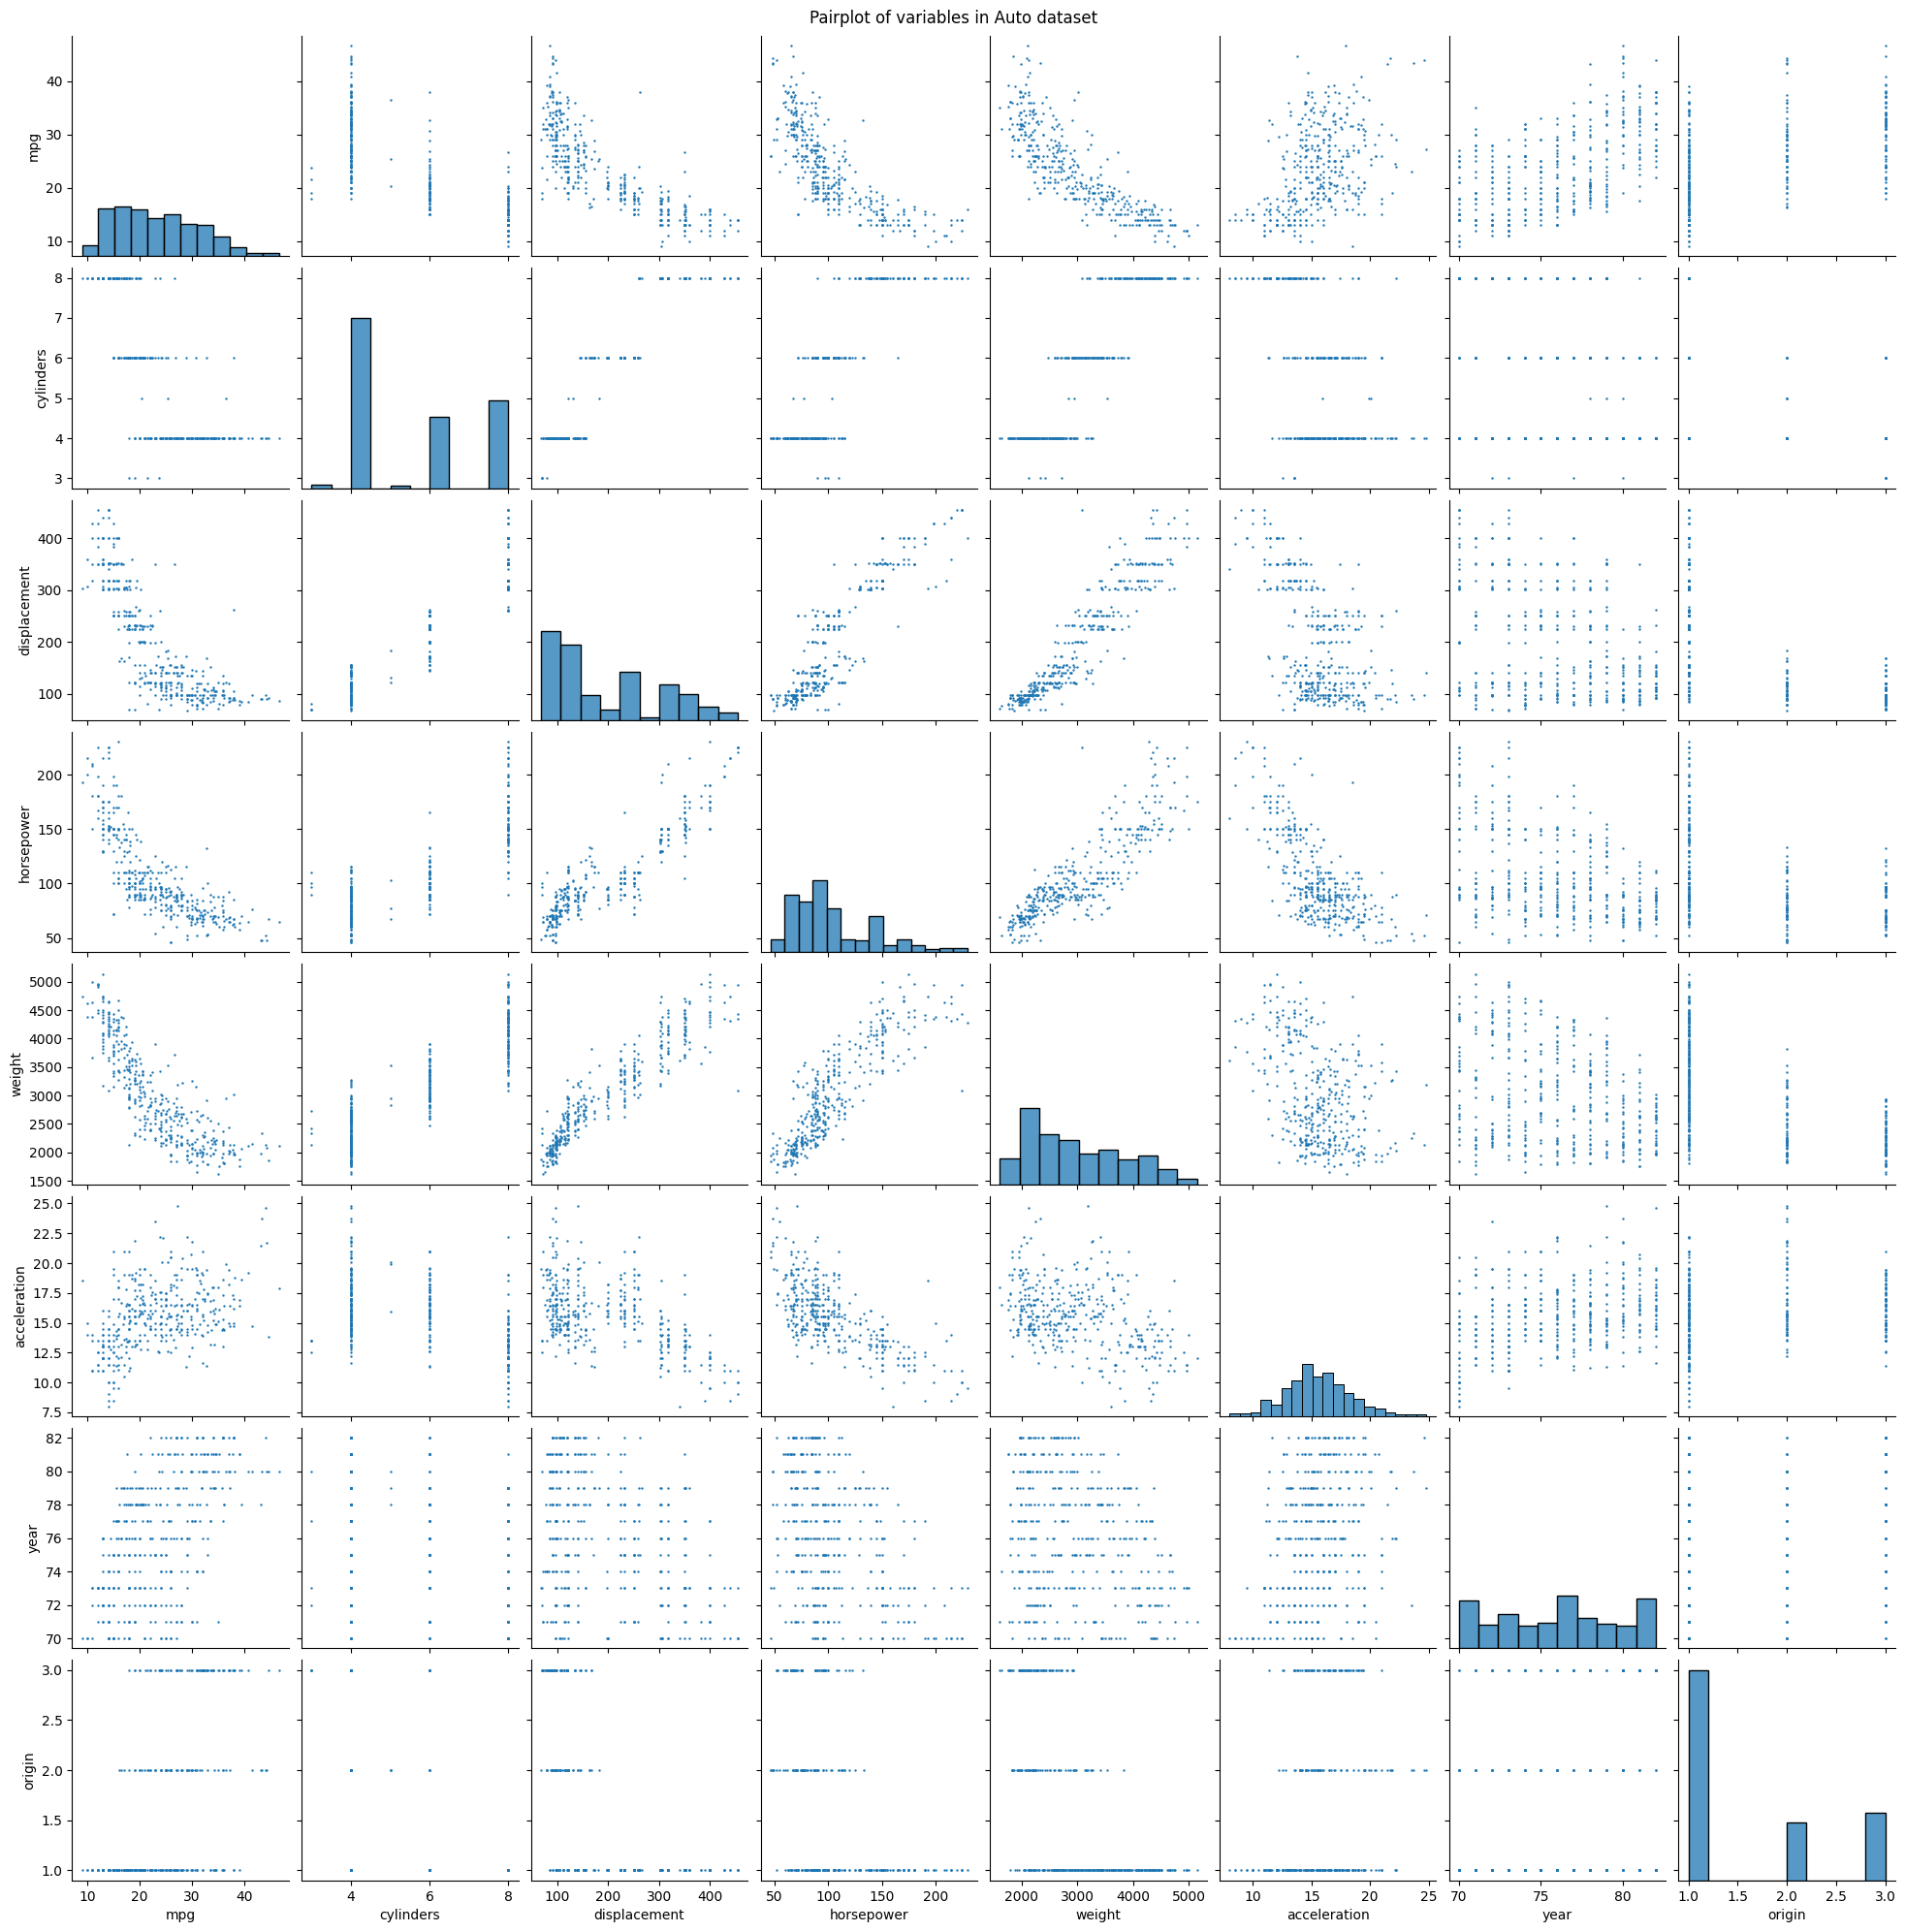

In [13]:
plt.figure(figsize=(14, 8));
ax = sns.pairplot(df, plot_kws=dict(linewidth=0, s=3));
ax.fig.suptitle("Pairplot of variables in Auto dataset", y=1);

## Baseline model, v0 (version 0)


### Train and test observations

We first need to (*randomly!*) split the observations into train and test sets. Then train model on train observations and evaluate on the test observations. For reproducibility, we always seed our models with any number (zero is good as any). We hold out 20% of observations for computing **out-of-sample** (testing) performance.

IMPORTANT: It is absolutely crucial to assure your response variable is not part of the input. Such **leakage** is a typical mistake. If your model's results are too good to be true, suspect leakage.

We have
* `X_train` are training features
* `X_test` are the corresponding training responses
* `y_train` are validation (testing) features
* `y_test` are the corresponding validation (testing) responses.

**Takeaway:** Finally, we do a sanity check and confirm that
* we have 313 train responses and 313 train observations
* 79 test responses and 79 test observations.
* 7 features go into the model during training.
* 7 features go into the model during testing.



In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [20]:
target_variable = 'mpg'
X_train, X_test, y_train, y_test = tts(df.drop(target_variable, axis=1), df[target_variable], test_size=0.2, random_state=42)

print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


**Why:** A rapid prototyping will produce an immediate feedback on our minimal efforts. We will use the results of the model v0 as a benchmark in the next iteration. If v1 model outperforms v0, we'll keep v1. Otherwise, we'll try different alterations.

**Takeaway:**
* The $R^2_{\text{OOS}}=0.83$ is very high, but we did observe strong correlations between inputs and response and low correlations among inputs. So, this result is not unusual and leakage is not a concern.
* The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems. We should try to remove highly correlated features in future iterations.
* This baseline model has no bias (intercept) term in the table of coefficients. Perhaps adding it in v1 model would improve the $R^2_{\text{OOS}}$.




In [21]:
mdl = sm.OLS(y_train, X_train)     # training on train observations
fmdl = mdl.fit()

In [22]:
fmdl.summary(title='Baseline model for Auto dataset', alpha=.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Baseline model for Auto dataset                            
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2333.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                   2.61e-261
Time:                        07:09:28   Log-Likelihood:                         -825.03
No. Observations:                 313   AIC:                                      1664.
Df Residuals:                     306   BIC:                                      1690.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------------------------------------------------
cylinders       -0.5474      0.374     -1.462      0.145      -1.518       0.423
displacement     0.0168      0.009      1.946      0.053      -0.006       0.039
horsepower      -0.0450      0.014     -3.149      0.002      -0.082      -0.008
weight          -0.0057      0.001     -7.897      0.000      -0.008      -0.004
acceleration    -0.1221      0.102     -1.199      0.231      -0.386       0.142
year             0.5855      0.027     21.927      0.000       0.516       0.655
origin           1.4815      0.315      4.706      0.000       0.666       2.297
==============================================================================
Omnibus:                       40.129   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.106
Skew:                           0.763   Prob(JB):                     4.42e-15
Kurtosis:                       4.656   Cond. No.                     6.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
y_pred = fmdl.predict(X_test)   # predicted values on the testing set
print(f'Out of sample R^2 is {r2_score(y_test, y_pred):.2f}')

Out of sample R^2 is 0.78


In [26]:
from sklearn.metrics import mean_squared_error
print(f'Out of sample MSE is {mean_squared_error(y_test, y_pred):.2f}')
print(f'Out of sample RMSE is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Out of sample MSE is 10.99
Out of sample RMSE is 3.31


## Version 1

Let's add constant term and rerun the model fit

**Why:** We are trying to improve a model and fix possible issues

**Takeaway:**
* The $R^2_{\text{OOS}}=0.84$ -- small improvement over v0
* Multicollinearity is still present -- we might need to fix it in v2

In [40]:
target_variable = 'mpg'
columns_to_drop = [target_variable]
X_train, X_test, y_train, y_test = tts(df.drop(columns_to_drop, axis=1), df[target_variable], test_size = 0.2, random_state=42)
print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


In [41]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [42]:
mdlv2 = sm.OLS(y_train, X_train)     # training on train observations
fmdlv2 = mdlv2.fit()

In [43]:
fmdlv2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          8.43e-112
Time:                        07:20:48   Log-Likelihood:                -819.10
No. Observations:                 313   AIC:                             1654.
Df Residuals:                     305   BIC:                             1684.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.4994      5.392     -3.431      0.001     -29.109      -7.890
cylinders       -0.3458      0.373     -0.928      0.354      -1.079       0.388
displacement     0.0151      0.008      1.780      0.076      -0.002       0.032
horsepower      -0.0213      0.016     -1.362      0.174      -0.052       0.009
weight          -0.0061      0.001     -8.529      0.000      -0.008      -0.005
acceleration     0.0380      0.110      0.344      0.731      -0.179       0.255
year             0.7677      0.059     12.958      0.000       0.651       0.884
origin           1.6135      0.312      5.175      0.000       1.000       2.227
==============================================================================
Omnibus:                       30.025   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.889
Skew:                           0.640   Prob(JB):                     2.95e-10
Kurtosis:                       4.315   Cond. No.                     8.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y_pred = fmdlv2.predict(X_test)   # predicted values on the testing set
print(f'Out of sample R^2 is {r2_score(y_test, y_pred):.2f}')

Out of sample R^2 is 0.79


In [45]:
from sklearn.metrics import mean_squared_error
print(f'Out of sample MSE is {mean_squared_error(y_test, y_pred):.2f}')
print(f'Out of sample RMSE is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Out of sample MSE is 10.71
Out of sample RMSE is 3.27


# Multivariate linear regression by hands

Let's try to see what happens under the hood of statsmodel.OLS

**Why:** We want to understand the equations and possible issues for calculating coefficients

**Takeaway:**
* We have several ways to calculate by hands, but the result remains the same



In [46]:
X_train.shape

(313, 8)

In [47]:
X_train

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
260,1.0,6,225.0,110.0,3620,18.7,78,1
184,1.0,4,140.0,92.0,2572,14.9,76,1
174,1.0,6,171.0,97.0,2984,14.5,75,1
64,1.0,8,318.0,150.0,4135,13.5,72,1
344,1.0,4,86.0,64.0,1875,16.4,81,1
...,...,...,...,...,...,...,...,...
72,1.0,8,304.0,150.0,3892,12.5,72,1
107,1.0,6,232.0,100.0,2789,15.0,73,1
272,1.0,4,151.0,85.0,2855,17.6,78,1
352,1.0,4,98.0,65.0,2380,20.7,81,1


In [48]:
import numpy as np

In [ ]:
# Add the column of ones
# X_plus_ones = np.column_stack((X_train, np.ones(X_train.shape[0]))) # your code here
# X_plus_ones.shape

In [50]:
X_plus_ones = X_train.to_numpy()

In [51]:
X_plus_ones

array([[   1. ,    6. ,  225. ,  110. , 3620. ,   18.7,   78. ,    1. ],
       [   1. ,    4. ,  140. ,   92. , 2572. ,   14.9,   76. ,    1. ],
       [   1. ,    6. ,  171. ,   97. , 2984. ,   14.5,   75. ,    1. ],
       [   1. ,    8. ,  318. ,  150. , 4135. ,   13.5,   72. ,    1. ],
       [   1. ,    4. ,   86. ,   64. , 1875. ,   16.4,   81. ,    1. ],
       [   1. ,    8. ,  400. ,  190. , 4325. ,   12.2,   77. ,    1. ],
       [   1. ,    4. ,   89. ,   62. , 1845. ,   15.3,   80. ,    2. ],
       [   1. ,    6. ,  181. ,  110. , 2945. ,   16.4,   82. ,    1. ],
       [   1. ,    6. ,  231. ,  115. , 3245. ,   15.4,   79. ,    1. ],
       [   1. ,    8. ,  260. ,  110. , 4060. ,   19. ,   77. ,    1. ],
       [   1. ,    6. ,  250. ,  100. , 3781. ,   17. ,   74. ,    1. ],
       [   1. ,    4. ,  140. ,   88. , 2890. ,   17.3,   79. ,    1. ],
       [   1. ,    6. ,  145. ,   76. , 3160. ,   19.6,   81. ,    2. ],
       [   1. ,    4. ,   97. ,   67. , 1985. ,   1

## Task: implement OLS using numpy matrix operations.

Recall the OLS method for some data matrix $X$, coefficients $\theta$ and a vector of output variables $y$:
$$X \cdot \theta = y$$
$$X^T X \theta = X^T y$$
Finally:
$$\theta = (X^T X )^{-1} X^T y$$

Compute the coefficients using `np.matmul`, `np.linalg.inv` and the `.T` operation.

In [52]:
coefficients_analytical = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_plus_ones.T, X_plus_ones)),
                                  X_plus_ones.T), y_train) # your code here

In [53]:
coefficients_analytical

array([-18.4994,  -0.3458,   0.0151,  -0.0213,  -0.0061,   0.038 ,   0.7677,   1.6135])

In [56]:
mdl = sm.OLS(y_train, X_train)     # training on train observations
fmdl = mdl.fit()
print(fmdl.summary(title='Second iteration for Auto dataset', alpha=.01))
y_pred = fmdl.predict(X_test)   # predicted values on the testing set
print(f'Out of sample R^2 is {r2_score(y_test, y_pred):.2f}')

                      Second iteration for Auto dataset                       
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          8.43e-112
Time:                        07:28:29   Log-Likelihood:                -819.10
No. Observations:                 313   AIC:                             1654.
Df Residuals:                     305   BIC:                             1684.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------------------------------------------------
const          -18.4994      5.392     -3.431   

In [57]:
X_test.shape

(79, 8)

In [58]:
coefficients_analytical.shape

(8,)

In [60]:
y_pred_numpy = X_test @ coefficients_analytical

In [61]:
(y_pred - y_pred_numpy).sum()

-3.6926905977452407e-11

Compare these coefficients with the ones we obtained from `sm.OLS` earlier.

### Task: Predict using the obtained coefficients

Complete the function to apply our model to test data!
Ensure the out of sample $R^2$ you get is similar to previous results.

In [ ]:
# We need add the constant column in X too, and in the same place as for training data
X_test_ones = # your code here

### Solution:

In [ ]:
X_plus_ones = # your code here
# not the most efficient way
theta_analytical = # your code here
def predict(coefficients, X):
    return np.matmul(X, coefficients)
y_pred = predict(coefficients_analytical, X_test_ones)   # predicted values on the testing set

print(f'Out of sample R^2 is {r2_score(y_test, y_pred):.2f}')
theta_analytical

## Better ways to implement OLS regression

In [65]:
# sligtly better way
theta_analytical_v2 = np.linalg.solve(np.matmul(X_plus_ones.T, X_plus_ones), np.matmul(X_plus_ones.T, y_train))
theta_analytical_v2

array([-18.4994,  -0.3458,   0.0151,  -0.0213,  -0.0061,   0.038 ,   0.7677,   1.6135])

In [66]:
# optimized way
theta_analytical_v3 = np.linalg.lstsq(X_plus_ones, y_train, rcond=None)[0]
theta_analytical_v3

array([-18.4994,  -0.3458,   0.0151,  -0.0213,  -0.0061,   0.038 ,   0.7677,   1.6135])

# kNN for regression

**Why:** Since we saw that there are a lot of non-linear dependencies, indeed let's try to use something nonlinear. We start from kNN

**Takeaway:** We see that very simple approach with only 5 neighbours works worse than our baseline model. Let's try to go further and scale our features



In [68]:
target_variable = 'mpg'
X_train, X_test, y_train, y_test = tts(df.drop(target_variable, axis=1), df[target_variable], test_size = 0.2, random_state=42)
print(f'Sanity check for dimensions of variables: {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')

Sanity check for dimensions of variables: ((313, 7), (79, 7), (313,), (79,))


In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)   # predicted values on the testing set
print(f'\n\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')

KNeighborsRegressor()



Out of sample R^2 is 0.65


In [70]:
from sklearn.metrics import mean_squared_error
print(f'Out of sample MSE is {mean_squared_error(y_test, y_pred):.2f}')
print(f'Out of sample RMSE is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Out of sample MSE is 17.75
Out of sample RMSE is 4.21


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)

standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [73]:
pd.DataFrame(standardized_X, columns=X_train.columns).describe()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,3.13e+02,3.13e+02,3.13e+02,3.13e+02,3.13e+02,3.13e+02,3.13e+02
mean,1.48e-16,3.97e-17,-1.48e-16,2.55e-16,5.65e-16,-1.80e-15,1.72e-16
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.46e+00,-1.21e+00,-1.53e+00,-1.64e+00,-2.68e+00,-1.71e+00,-6.90e-01
25%,-8.73e-01,-8.74e-01,-7.48e-01,-8.96e-01,-7.27e-01,-8.85e-01,-6.90e-01
50%,-8.73e-01,-4.30e-01,-2.51e-01,-1.56e-01,-1.57e-02,-5.73e-02,-6.90e-01
75%,1.48e+00,1.03e+00,6.39e-01,7.85e-01,6.24e-01,7.70e-01,5.51e-01
max,1.48e+00,2.50e+00,3.28e+00,2.56e+00,3.29e+00,1.60e+00,1.79e+00


In [74]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(standardized_X, y_train)
y_pred = knn.predict(standardized_X_test)   # predicted values on the testing set
print(f'\n\nOut of sample R^2 is {r2_score(y_test, y_pred):.2f}')

KNeighborsRegressor()



Out of sample R^2 is 0.86


In [75]:
from sklearn.metrics import mean_squared_error
print(f'Out of sample MSE is {mean_squared_error(y_test, y_pred):.2f}')
print(f'Out of sample RMSE is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Out of sample MSE is 7.17
Out of sample RMSE is 2.68


In [76]:
x_var = 2
var_name = X_train.columns[x_var]
xx_train = X_train.iloc[:, x_var].values.reshape(-1, 1)
xx_test = X_test.iloc[:, x_var].values.reshape(-1, 1)
x_grid = np.linspace(xx_train.min(), xx_train.max(), 100).reshape(-1, 1)

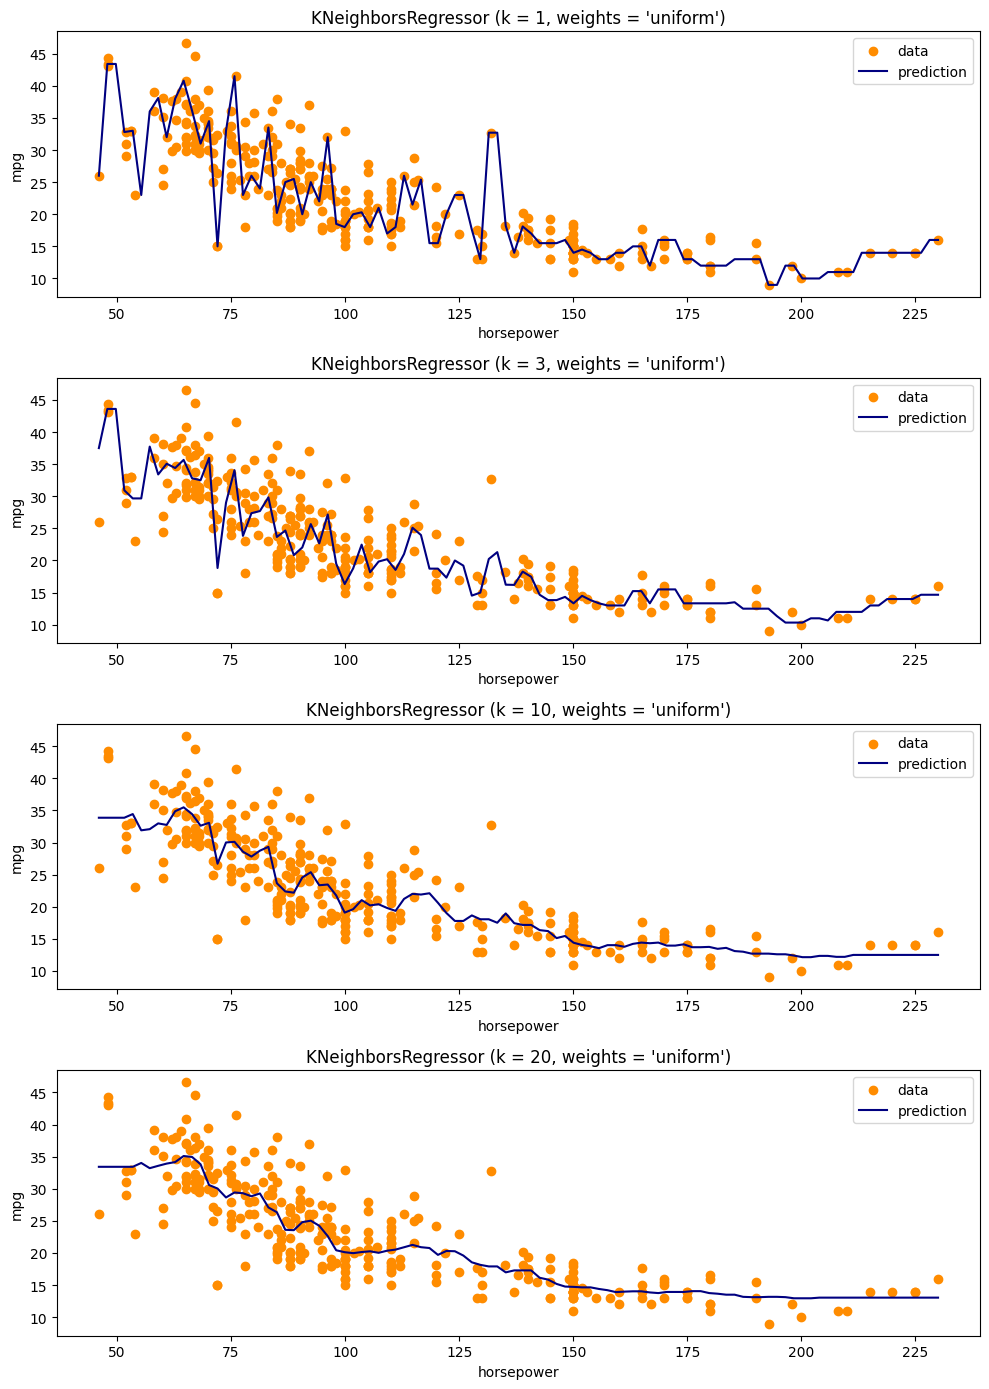

In [77]:
weights = 'uniform'

plt.figure(figsize=(10, 14))

for i, n_neighbors in enumerate([1, 3, 10, 20]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(xx_train, y_train.values)

    y_grid = knn.predict(x_grid)

    plt.subplot(4, 1, i + 1);
    plt.scatter(xx_train, y_train, color='darkorange', label='data');
    plt.plot(x_grid, y_grid, color='navy', label='prediction');
    plt.axis('tight');
    plt.ylabel(target_variable)
    plt.xlabel(var_name);
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights));

plt.tight_layout();
plt.show();

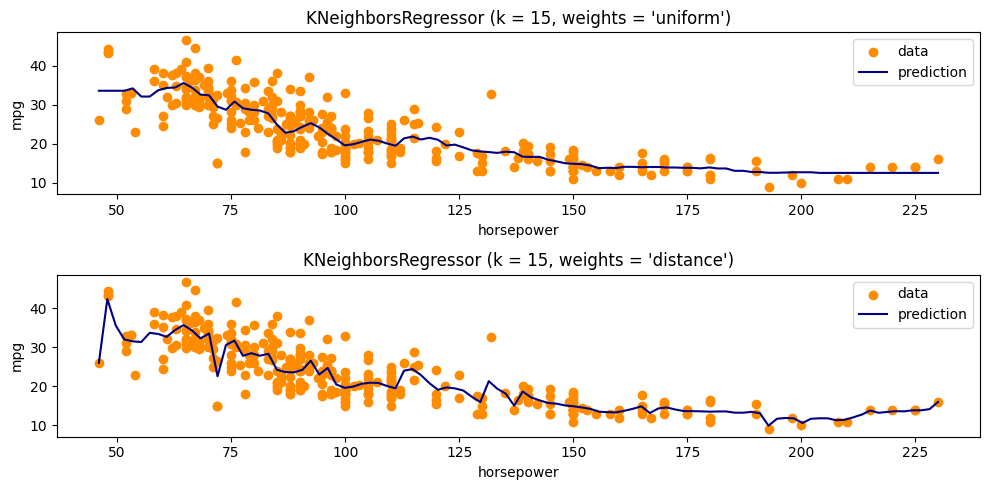

In [78]:
n_neighbors = 15

plt.figure(figsize=(10, 5))

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(xx_train, y_train.values)

    y_grid = knn.predict(x_grid)

    plt.subplot(2, 1, i + 1);
    plt.scatter(xx_train, y_train, color='darkorange', label='data');
    plt.plot(x_grid, y_grid, color='navy', label='prediction');
    plt.axis('tight');
    plt.ylabel(target_variable)
    plt.xlabel(var_name);
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights));

plt.tight_layout();
plt.show();

In [79]:
weights

'distance'

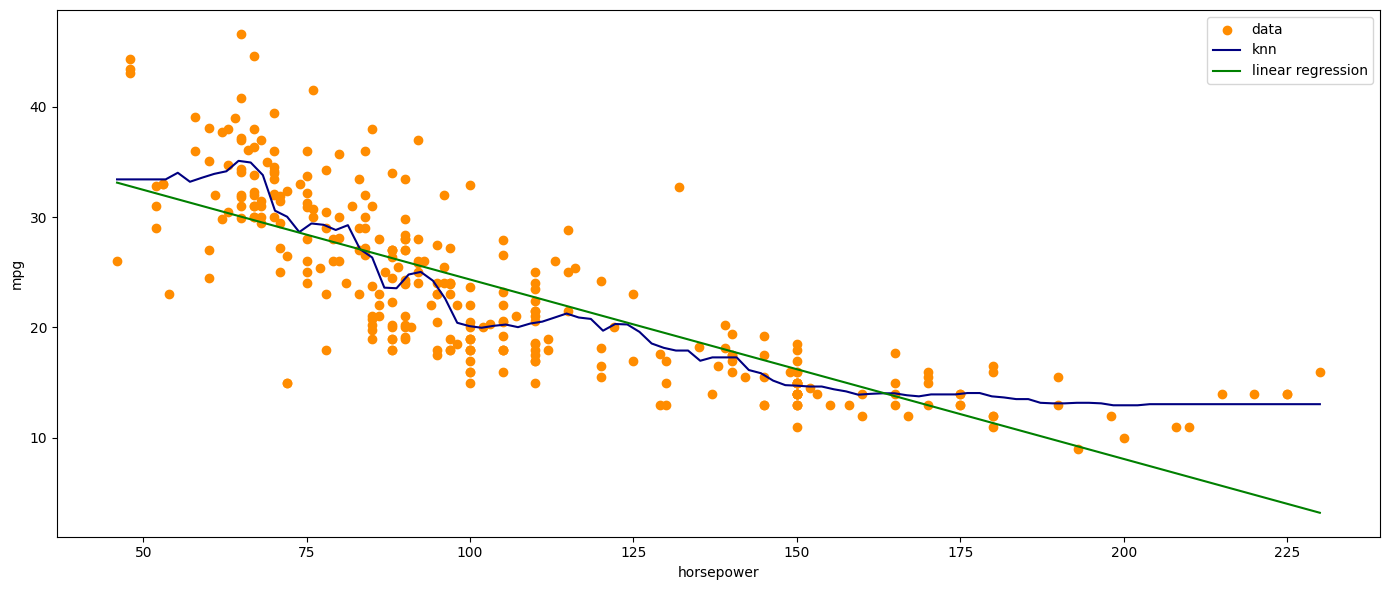

In [80]:
plt.figure(figsize=(14, 6))
plt.scatter(xx_train, y_train, color='darkorange', label='data')

# knn prediction
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn.fit(xx_train, y_train.values)
y_grid = knn.predict(x_grid)
plt.plot(x_grid, y_grid, color='navy', label='knn')
#print(f'kNN Regressor \n\nOut of sample R^2 is {r2_score(y_test, y_grid):.2f}')

# linear regression prediction
mdl = sm.OLS(y_train.values, sm.add_constant(xx_train)).fit()    # training on train observations
y_grid = mdl.predict(sm.add_constant(x_grid))   # predicted values on the testing set
plt.plot(x_grid, y_grid, color='green', label='linear regression');
#print(f'OLS \n\nOut of sample R^2 is {r2_score(y_test, y_grid):.2f}')


plt.ylabel(target_variable)
plt.xlabel(var_name);
plt.axis('tight');
plt.legend();

plt.tight_layout();
plt.show();